In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import seaborn as sns

In [2]:
#changong data types to datetime format for users table
#dropping sessions with requests higher than 90 kWh (there are no cars with batteries bigger than 90 kWh)

users_to_clean = pd.read_csv('./data/users.csv')
users_to_clean['Modified'] = pd.to_datetime(users_to_clean.modifiedAt, infer_datetime_format=True)  
users_to_clean['Departure'] = pd.to_datetime(users_to_clean.requestedDeparture, infer_datetime_format=True)

users_drop = users_to_clean.drop(columns = ['requestedDeparture', 'modifiedAt', 'Unnamed: 0'])
users = users_drop[users_drop.kWhRequested <= 90]


#changing data types to datetime format for users table

charging_to_clean = pd.read_csv('./data/charging.csv')
charging_to_clean['ConnectionTime'] = pd.to_datetime(charging_to_clean.connectionTime, infer_datetime_format=True) 
charging_to_clean['DisconnectTime'] = pd.to_datetime(charging_to_clean.disconnectTime, infer_datetime_format=True) 
charging_to_clean['DoneCharging'] = pd.to_datetime(charging_to_clean.doneChargingTime, infer_datetime_format=True) 

charging = charging_to_clean.drop(columns = ['connectionTime', 'disconnectTime', 'doneChargingTime', 'Unnamed: 0'])

In [16]:
#selecting cars with WhPerMile around 242
mask = users.WhPerMile < 250
tesla_users = users[mask]

tesla_IDs = tesla_users.userID.unique()
tesla_charging_mask = charging.userID.isin(tesla_IDs)
tesla_charging = charging[tesla_charging_mask]
tesla_charging.describe()

,clusterID,kWhDelivered,siteID,userID
count,2824.0,2824.000000,2824.0,2824.000000
mean,39.0,13.055246,2.0,797.657932
std,0.0,11.867470,0.0,729.557947
min,39.0,0.562000,2.0,43.000000
25%,39.0,4.888750,2.0,515.000000
50%,39.0,10.180000,2.0,564.000000
75%,39.0,15.832500,2.0,891.000000
max,39.0,59.830000,2.0,6952.000000


In [17]:
tesla_users.describe()

,WhPerMile,kWhRequested,milesRequested,minutesAvailable,userID
count,1269.000000,1269.000000,1269.000000,1269.000000,1269.000000
mean,210.620961,24.603601,116.326241,355.733649,892.028369
std,15.089237,15.662347,71.622625,186.967633,923.380086
min,200.000000,2.000000,10.000000,29.000000,43.000000
25%,200.000000,14.000000,70.000000,193.000000,364.000000
50%,200.000000,20.000000,100.000000,365.000000,564.000000
75%,227.000000,36.000000,170.000000,509.000000,891.000000
max,240.000000,69.900000,300.000000,1208.000000,6952.000000


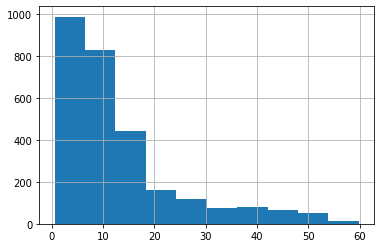

In [18]:
tesla_charging.kWhDelivered.hist()